<a href="https://colab.research.google.com/github/sahansharma/MachineLearning-DataMining/blob/main/K_NearestNeoghbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as npr

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline

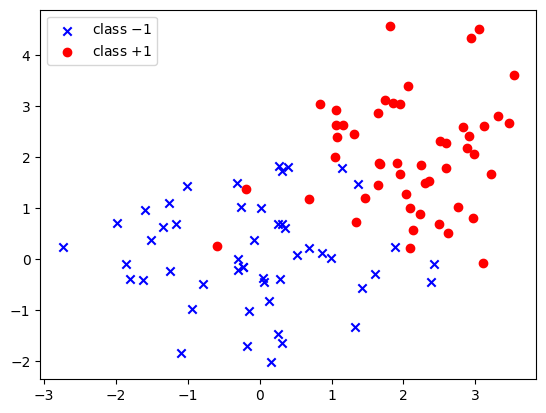

In [2]:
N = 100
X = npr.randn(N,2)
y = npr.choice((-1, +1) , size = N)

X[y>0, 0] += 2
X[y>0, 1] += 2

plt.scatter(X[y<0,0], X[y<0,1], color="b", marker="x", label="class $-1$")
plt.scatter(X[y>0,0], X[y>0,1], color="r", marker="o",  label="class $+1$")

plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off') # remove ticks
plt.legend(loc="best")

In [4]:

def plotClassifier(model, X, y, transformation=None, filename=None):
    x1 = X[:, 0]
    x2 = X[:, 1]

    x1_min, x1_max = int(x1.min()) - 1, int(x1.max()) + 1
    x2_min, x2_max = int(x2.min()) - 1, int(x2.max()) + 1

    x1_line =  np.linspace(x1_min, x1_max, 200)
    x2_line =  np.linspace(x2_min, x2_max, 200)

    x1_mesh, x2_mesh = np.meshgrid(x1_line, x2_line)
    mesh_data = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

    if transformation is not None:
        mesh_data = transformation(mesh_data)

    y_pred = model.predict(mesh_data)

    y_pred = np.reshape(y_pred, x1_mesh.shape)

    plt.xlim([x1_mesh.min(), x1_mesh.max()])
    plt.ylim([x2_mesh.min(), x2_mesh.max()])

    plt.contourf(x1_mesh, x2_mesh, -y_pred, cmap=plt.cm.RdBu, alpha=0.6)

    plt.scatter(x1[y < 0], x2[y < 0], color="b", marker="x", label="class $-1$")
    plt.scatter(x1[y > 0], x2[y > 0], color="r", marker="o", label="class $+1$")

    plt.legend(loc="best")

    plt.tick_params(axis='both', which='both', bottom='off', left='off',
                    labelbottom='off', labelleft='off')

    if filename is not None:
        plt.savefig(filename)


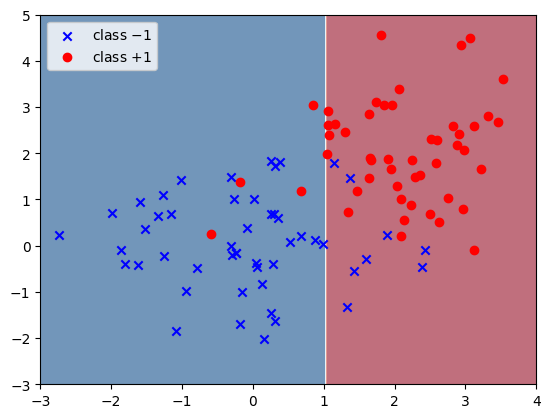

In [8]:
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(X,y)
plotClassifier(dt, X, y)

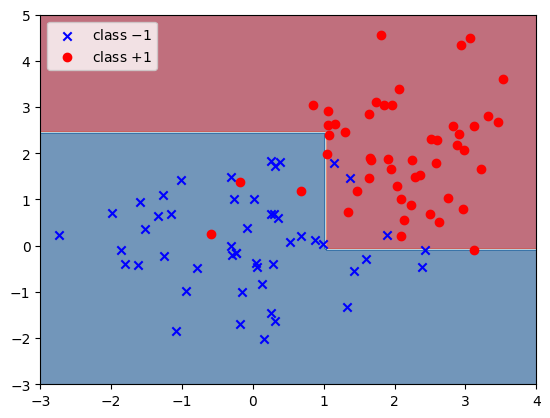

In [9]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X,y)
plotClassifier(dt, X, y)

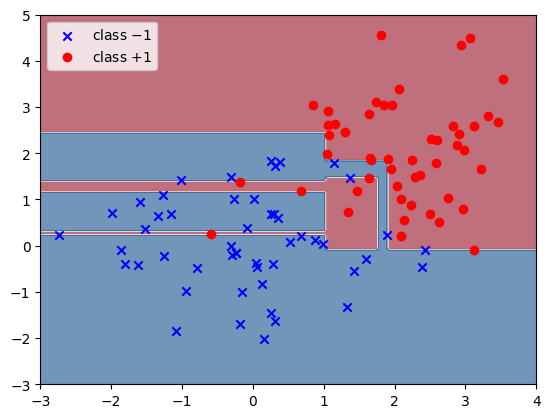

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X,y)
plotClassifier(dt, X, y)

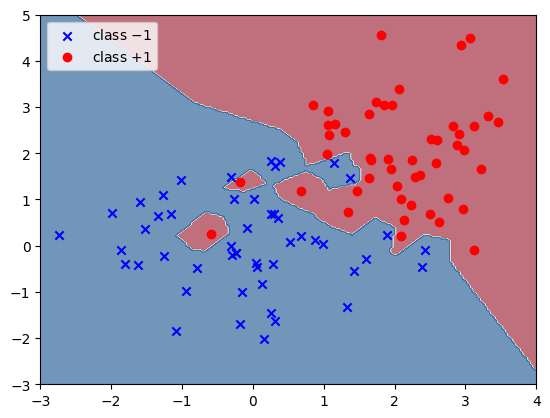

In [11]:
nn = KNeighborsClassifier(n_neighbors = 1)
nn.fit(X,y)
plotClassifier(nn, X, y)

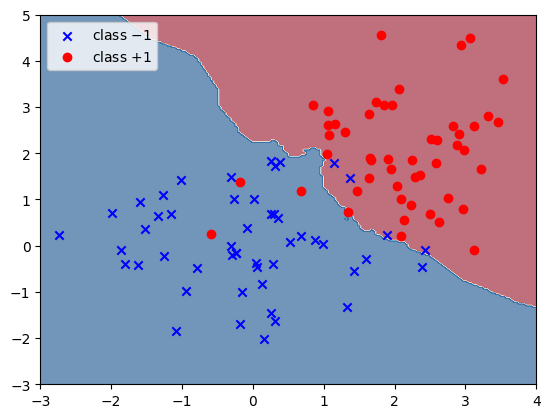

In [16]:
nn = KNeighborsClassifier(n_neighbors = 10)
nn.fit(X,y)
plotClassifier(nn, X, y)